## 04. 자동미분

In [57]:
import torch

### 4-1. requires_grad

In [58]:
x = torch.ones(3, requires_grad=True)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([1., 1., 1.], requires_grad=True)
None
None
True


In [59]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\hsjin\AppData\Local\Temp\ipykernel_28716\268873173.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [60]:
z = y ** 2
print(z)
# print(z.grad)
# print(z.grad_fn)
# print(z.requires_grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)


## 4-2. backward()
- x -> y -> z 순의 계산에서 역전파를 통해 기울기를 구함(z->y->x)

In [61]:
result = z.sum()
result.backward()

In [62]:
print(z)
print(x.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


### 4-3. no_grad()
- 역전파를 중지해주는 것

In [68]:
x = torch.tensor(1.0, requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    y = x**2
    print(x.requires_grad)
    print(y.requires_grad)

True
True
True
False


### 4-4. detach()
- 그래프에서 연산을 분리해 주는 역할을 함

In [69]:
y.detach()

tensor(1.)

In [ ]:
# %pip install matplotlib

### 실습1. 선형회귀 실습

Epoch [0 / 1000], loss:  563.1982
Epoch [100 / 1000], loss:  4.7238
Epoch [200 / 1000], loss:  4.3065
Epoch [300 / 1000], loss:  4.1522
Epoch [400 / 1000], loss:  4.0952
Epoch [500 / 1000], loss:  4.0741
Epoch [600 / 1000], loss:  4.0664
Epoch [700 / 1000], loss:  4.0635
Epoch [800 / 1000], loss:  4.0624
Epoch [900 / 1000], loss:  4.0620
Epoch [1000 / 1000], loss:  4.0619


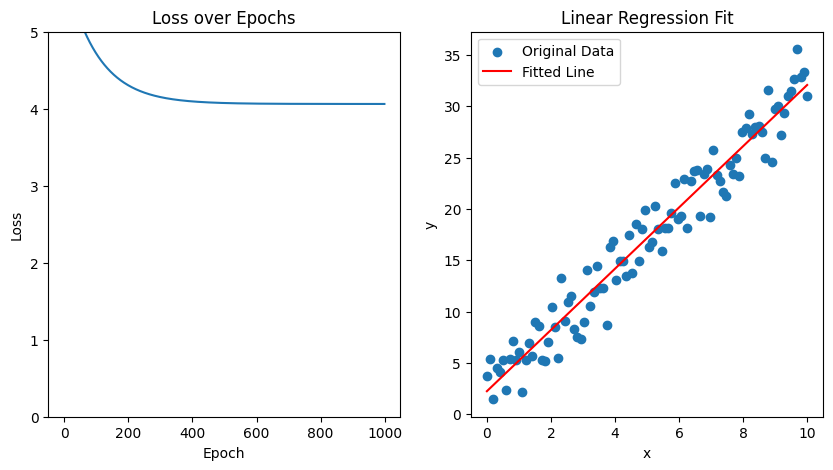

Model parameters
linear.weight : tensor([[2.9809]])
linear.bias : tensor([2.2548])


In [93]:
import torch.nn as nn #뉴럴네트워크의 약자임
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 입출력 정의
x = torch.linspace(0,10,100).view(-1,1)#입력 데이터 #(시작,끝,갯수) , view(-1,1) -1: 자동계산, 1: 열기준으로 뗀것
y = 3 * x + 2 + torch.randn(100,1)*2 #정답을 의미함
# print(x)
# print(y)

# 2. 모델 정의 (선형회귀)
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(1,1) #입력 1개, 출력 1개
        
    def forward(self,x):
        return self.linear(x)
    
model = LinearRegressionModel()

# 3. 손실함수 정의
#손실함수 선택 : MSE, MAE ...
loss_function = nn.MSELoss()

# 4. 가중치 업데이트 
# 경사하강법 -> 어떤 것을 사용할지 선택
optimizer = optim.SGD(model.parameters(), lr = 0.01) #확률적 경사하강법 lr:학습률(learning rate)

# 5. 학습 반복
epochs = 1000 #epochs:반복횟수
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화 
    outputs = model(x) #모델인 x를 예측한다.  #예측값 계산
    loss = loss_function(outputs, y) # 손실 게산
    loss.backward() # 역전파
    optimizer.step() #가중치 업데이트
    
    losses.append(loss.item()) #손실값 저장
    
    if epoch == 0: #100번당 한번씩 출력
        print(f'Epoch [{epoch} / {epochs}], loss: {loss.item(): .4f}')     
    
    if (epoch + 1) % 100 == 0: #100번당 한번씩 출력
        print(f'Epoch [{epoch + 1} / {epochs}], loss: {loss.item(): .4f}') 

# 6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1,2,1) #1행 2열로 나누고, 1번에 그리겠다.
plt.plot(losses)
plt.ylim(0,5)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 데이터와 예측 결과 시각화
plt.subplot(1,2,2) #1행 2열로 나누고, 2번에 그리겠다.
plt.scatter(x.numpy(),y.numpy(),label = 'Original Data') #넘파이로 바꿔야한다.
plt.plot(x.numpy(),model(x).detach().numpy(), color = 'red',label = 'Fitted Line') #detach()해서 분리해준다.
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print('Model parameters')
for name, param in model.named_parameters(): #가중치와 bias(편향)가 어떻게 나왔는지 보여주기 위해
    print(f'{name} : {param.data}')